In [2]:
# Importando as bibliotecas necessárias
import pandas as pd

# Carregar o dataset
insurance_data = pd.read_csv('C:\Github\Fiap_IA_Devs\Datasets\insurance.csv')

# Verificar os primeiros registros para entender a estrutura
#print(insurance_data.head())

# Verificar se há valores ausentes
missing_values = insurance_data.isnull().sum()
print("Valores ausentes por coluna:")
print(missing_values)

# One-Hot Encoding para as colunas categóricas
insurance_data_encoded = pd.get_dummies(insurance_data, columns=['sex', 'smoker', 'region'], drop_first=True)

# Exibir as primeiras linhas do dataset transformado
print(insurance_data_encoded.head(5))


Valores ausentes por coluna:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
   age     bmi  children      charges  sex_male  smoker_yes  region_northwest  \
0   19  27.900         0  16884.92400     False        True             False   
1   18  33.770         1   1725.55230      True       False             False   
2   28  33.000         3   4449.46200      True       False             False   
3   33  22.705         0  21984.47061      True       False              True   
4   32  28.880         0   3866.85520      True       False              True   

   region_southeast  region_southwest  
0             False              True  
1              True             False  
2              True             False  
3             False             False  
4             False             False  


In [5]:
### Descritivo dos dados 
insurance_data_encoded.describe()


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [12]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

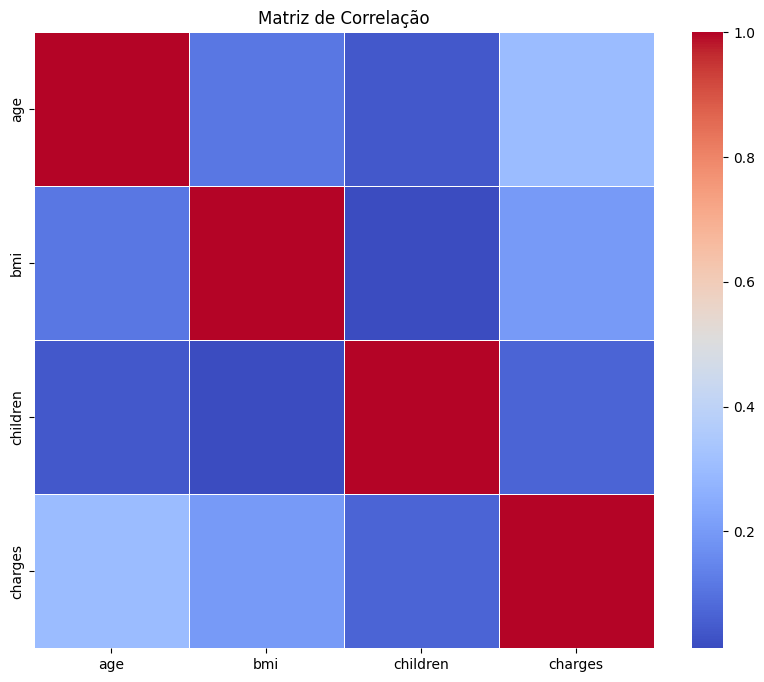

In [13]:
### Verificando correlação nos dados
# Criando dataframe somente com nossas variáveis numericas
df_fifa_numerico = insurance_data_encoded.select_dtypes([np.number])
# Calcula a matriz de correlação
correlation_matrix = df_fifa_numerico.corr()
correlation_matrix

# Visualização da matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação')
plt.show()